In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

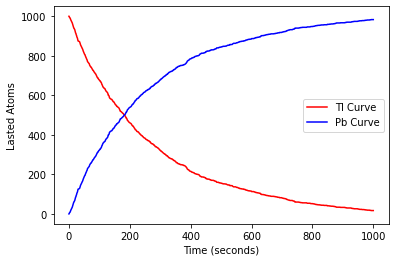

In [4]:
def probabiliy(t):
    return 1 - pow(2,(-t/tau))

#Defining Values
tau = 3.052 * 60 #in second
time_value = 1000
Tl = [1000]
Pb = [0]
t = 1

for t in range(time_value):
    p = probabiliy(1)
    probs = np.random.random(Tl[-1]) 
    n_tl = np.sum(probs < p)
    Tl.append(Tl[-1]-n_tl)
    Pb.append(Pb[-1]+n_tl)
   
fig = plt.figure()
plt.plot(Tl, label='Tl Curve', color='r')
plt.plot(Pb, label='Pb Curve', color='b')

plt.xlabel('Time (seconds)')

plt.ylabel('Lasted Atoms')
plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

For the Hit/Miss Method;
The computed integral value is equal to 1.3469844000 ± 0.0003131460


For the Mean Value Method;
The computed integral value is equal to 0.1347636501 ± 0.0014357062




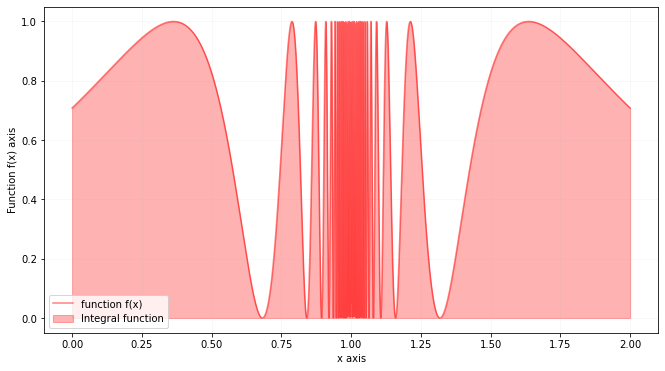

In [5]:
#Defining function
def f(x):
    return pow((np.sin(1/(1-x))), 2)

N=10000
x=np.linspace(1e-6, 2-1e-6, N)
fig, ax=plt.subplots(figsize=(11, 6))
ax.plot(x, f(x), label='function f(x)', color='r', alpha=0.5)
ax.fill_between(x, f(x), where=[(x > 0)and(x < 2)for x in x], color='red', alpha=0.3, label='Integral function')
ax.set_xlabel('x axis')
ax.set_ylabel('Function f(x) axis')
ax.legend()
ax.grid(alpha=0.1)



##Plot the function and compute the integral of  𝑓(𝑥)  between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral  𝑁  times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)

N = 100000
r = 100
integral_hit_miss=[]

for i in range(r): 
    count=0
    for j in range(N):
        x_1=2*np.random.random() 
        y=np.random.random()
        if y<f(x_1):
            count+=1
    integral_hit_miss.append(2*count/N)

mean=np.mean(integral_hit_miss)
error_hit_miss_method=np.std(integral_hit_miss)/np.sqrt(r)

print('For the Hit/Miss Method;')
print('The computed integral value is equal to %.10f ± %.10f' %(mean, error_hit_miss_method))
print("\n")

#Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.
integral_mean_value=2*np.sum(f(x))/N  #V=b-a=2
error_mean_value=2*np.sqrt((np.sum(f(x)**2)/N-np.sum(f(x)/N)**2)/N)

print('For the Mean Value Method;')
print('The computed integral value is equal to %.10f ± %.10f' % (integral_mean_value,error_mean_value))
print("\n")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [41]:
#Compute the area of a circle of unit radius, by integrating the function 
def f(x, y):    
    if (x**2 + y**2) <= 1:
        result = 1
    else:
        result = 0
    return result

N = 1000
circle_index = 0

for i in range(N):
    x = np.random.random() 
    y = np.random.random()     
    if f(x,y): 
        circle_index = circle_index + 1

#Using area of circle formula
Area_of_circle = 4 * (circle_index / N)
print("Area of Circle is equal to: ", Area_of_circle )
print("Result has been found by using the integrating the function.")

#Defining a new function to generalize the result ()
def f_general(variable):    
    result = 0
    for i in variable:
        result = result + i**2
    if result <= 1:
        return 1
    else:
        return 0

sphere_index = 0
for i in range(N):
    point_array = []
    for j in range(10):
        point_array.append(np.random.random())
    if (f_general(point_array)):
        sphere_index = sphere_index + 1

#Using area of circle formula for 10D sphere
Area_of_sphere = 2**10*(sphere_index/N)
print('\n')
print("10D Sphere volume is equal to:", Area_of_sphere)
print("Result that found at last taks has been used to generalize the function.")


Area of Circle is equal to:  3.032
Result has been found by using the integrating the function.


10D Sphere volume is equal to: 2.048
Result that found at last taks has been used to generalize the function.


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [83]:
#Defining function w and f  to be used in calculation process
def w(x):
    return 1/(np.sqrt(x))

def f(x):
    return x**-0.5/(np.exp(x)+1)

N = 1000000

# integral
x = np.random.rand(N)**2
integral_value = 2 / N * np.sum(f(x) / w(x))
print("Result of Integral Calculation is equalt %.10f" % integral_value)

Result of Integral Calculation is equalt 0.8387698017
